In [2]:
import PyOctaveBand
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Sample rate and duration
fs = 48000
duration = 5  # In seconds
frq_limits = [12, 20000]

In [4]:
# Time array
x = np.arange(np.round(fs * duration)) / fs
print(x)

[0.00000000e+00 2.08333333e-05 4.16666667e-05 ... 4.99993750e+00
 4.99995833e+00 4.99997917e+00]


In [5]:
def signal(x):
    # Signal with 6 frequencies
    f1, f2, f3, f4, f5, f6 = 20, 100, 500, 2000, 4000, 15000
    # Multi Sine wave signal
    return 100 \
        * (np.sin(2 * np.pi * f1 * x)
           + np.sin(2 * np.pi * f2 * x)
           + np.sin(2 * np.pi * f3 * x)
           + np.sin(2 * np.pi * f4 * x)
           + np.sin(2 * np.pi * f5 * x)
           + np.sin(2 * np.pi * f6 * x))

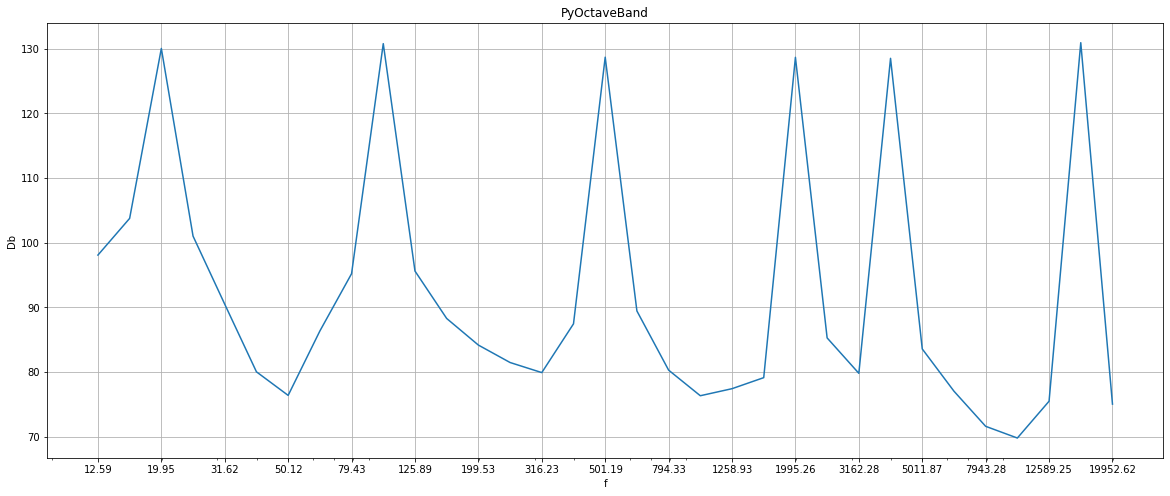

In [21]:
y = signal(x)

# Filter (only octave spectra)
spl, freq = PyOctaveBand.octavefilter(y, fs=fs, fraction=3, order=20, limits=[12, 20000])
freq = np.array(freq)

plt.figure(figsize=(20,8))
plt.plot(freq, spl)
plt.xscale('log')

plt.grid()
plt.ylabel('Db')
plt.xlabel('f')
plt.title('PyOctaveBand')

idxes = [i % 2 == 0 for i in range(len(freq))]
plt.xticks(freq[idxes], np.round(freq[idxes],2))

plt.show()